In [1]:
#pip install /Users/qingchuanlyu/Documents/Conferences/ICML-2025/icml2025/code/mlrose

In [2]:
import mlrose_hiive as mh

In [4]:
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import accuracy_score

from IPython.core.display import display, HTML # for some notebook formatting.

import logging
import networkx as nx
import matplotlib.pyplot as plt
import string


from ast import literal_eval

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import accuracy_score

# switch off the chatter
logging.basicConfig(level=logging.WARNING)

In [5]:
import pandas as pd
import importlib
import utility as u

In [6]:
class Task:
    def __init__(self, task_id, duration, deadline, profit):
        self.task_id = task_id
        self.duration = duration
        self.deadline = deadline
        self.profit = profit

In [7]:
size = 18
importlib.reload(u)
tasks = u.generate_random_tasks(size, 5, 80, 25)

In [8]:
"""
with open(f"{size}_tasks.txt", "a") as f:
    for t in tasks:
        print(t.task_id, t.duration, t.deadline, t.profit, file=f)
"""

In [9]:
# # Job Scheduling
problem_ffp = mh.JobSchedulingGenerator().generate(seed=0, size=size, tasks=tasks, break_time=1, work_limit=2)
#state = problem_ffp.get_state()

In [10]:
problem_ffp.length

18

In [11]:
problem_ffp.fitness

238.0

In [12]:
# GAJ runner class
# 1. tune population size and mutation rates
ga_ffp = mh.GARunner(problem=problem_ffp,
              experiment_name='ffp_ga',
              output_directory=None, # note: specify an output directory to have results saved to disk
              seed=0,
              iteration_list=2 ** np.arange(12),
              max_attempts=500,
              population_sizes=[40, 50, 60],
              mutation_rates=[0.07, 0.08]) # Probability of a mutation at each element of the state vector during reproduction, expressed as a value between 0 and 1.

# the two data frames will contain the results
df_run_stats_ffp, df_run_curves_ffp = ga_ffp.run()

In [13]:
df_run_curves_ffp.shape

(5224, 7)

In [14]:
df_run_curves_ffp.head()

,Iteration,Time,Fitness,FEvals,Population Size,Mutation Rate,max_iters
0,0,0.003264,214.0,0.0,40,0.07,2048
1,1,0.017912,285.0,2.0,40,0.07,2048
2,2,0.024782,285.0,3.0,40,0.07,2048
3,3,0.030073,285.0,4.0,40,0.07,2048
4,4,0.034374,285.0,5.0,40,0.07,2048


In [15]:
df_run_curves_ffp['Fitness'].max()

422.0

In [16]:
df_run_curves_ffp[df_run_curves_ffp.Fitness == df_run_curves_ffp['Fitness'].max()]

,Iteration,Time,Fitness,FEvals,Population Size,Mutation Rate,max_iters
4723,317,1.853188,422.0,351.0,60,0.08,2048
4724,318,1.856311,422.0,352.0,60,0.08,2048
4725,319,1.859652,422.0,353.0,60,0.08,2048
4726,320,1.864293,422.0,354.0,60,0.08,2048
4727,321,1.871657,422.0,355.0,60,0.08,2048
...,...,...,...,...,...,...,...
5219,813,6.472762,422.0,847.0,60,0.08,2048
5220,814,6.527194,422.0,848.0,60,0.08,2048
5221,815,6.554058,422.0,849.0,60,0.08,2048
5222,816,6.561009,422.0,850.0,60,0.08,2048


In [17]:
# need to check Time and FEvals

In [18]:
df_curves_bestfitness_ffp = df_run_curves_ffp[(df_run_curves_ffp['Fitness'] == df_run_curves_ffp['Fitness'].max())]

In [19]:
df_curves_bestfitness_ffp

,Iteration,Time,Fitness,FEvals,Population Size,Mutation Rate,max_iters
4723,317,1.853188,422.0,351.0,60,0.08,2048
4724,318,1.856311,422.0,352.0,60,0.08,2048
4725,319,1.859652,422.0,353.0,60,0.08,2048
4726,320,1.864293,422.0,354.0,60,0.08,2048
4727,321,1.871657,422.0,355.0,60,0.08,2048
...,...,...,...,...,...,...,...
5219,813,6.472762,422.0,847.0,60,0.08,2048
5220,814,6.527194,422.0,848.0,60,0.08,2048
5221,815,6.554058,422.0,849.0,60,0.08,2048
5222,816,6.561009,422.0,850.0,60,0.08,2048


In [20]:
df_curves_bestfitness_ffp.groupby(['Population Size', 'Mutation Rate']).agg({'FEvals': 'min', 'Iteration': 'mean', 'Time': 'min'}).reset_index()
# Temp = 1 => less Fevals. Pick temp=1

,Population Size,Mutation Rate,FEvals,Iteration,Time
0,60,0.08,351.0,567.0,1.853188


In [21]:
# tentatively, pick pop size = 60 and mutation_rate = 0.08

In [21]:
df_run_curves_ffp.head()

,Iteration,Time,Fitness,FEvals,Population Size,Mutation Rate,max_iters
0,0,0.003264,214.0,0.0,40,0.07,2048
1,1,0.017912,285.0,2.0,40,0.07,2048
2,2,0.024782,285.0,3.0,40,0.07,2048
3,3,0.030073,285.0,4.0,40,0.07,2048
4,4,0.034374,285.0,5.0,40,0.07,2048


In [23]:
# clean up an existing result table to store the iterative resutls
df_iter_curves_ffp = df_run_curves_ffp.drop(df_run_curves_ffp.index, inplace=False)

In [24]:
# GA runner
# 2. iterate through 10 seeds
for s in range(10):
    ga_ffp = mh.GARunner(problem=problem_ffp,
              experiment_name='ffp_ga_{s}',
              output_directory=None, # note: specify an output directory to have results saved to disk
              seed=s,
              iteration_list=2 ** np.arange(12),
              max_attempts=500,
              population_sizes=[60], # 20 bits in total
              mutation_rates=[0.08])

    # the two data frames will contain the results
    df_run_stats_ffp_sub, df_run_curves_ffp_sub = ga_ffp.run()
    # append to the result df
    df_iter_curves_ffp = pd.concat([df_iter_curves_ffp, df_run_curves_ffp_sub])

In [25]:
df_iter_curves_ffp.shape

(8158, 7)

In [26]:
df_iter_curves_ffp.head()

,Iteration,Time,Fitness,FEvals,Population Size,Mutation Rate,max_iters
0,0,0.005196,214.0,0.0,60,0.08,2048
1,1,0.033447,275.0,2.0,60,0.08,2048
2,2,0.055235,277.0,4.0,60,0.08,2048
3,3,0.068461,303.0,6.0,60,0.08,2048
4,4,0.078774,303.0,7.0,60,0.08,2048


In [27]:
df_iter_curves_ffp.Fitness.max()

422.0

In [65]:
df_iter_curves_ffp.to_csv(f'../../csv-files/ga_js_{size}.csv')

In [1]:
import pandas as pd
import numpy as np
size = 18
df_iter_curves_ffp = pd.read_csv(f'../../csv-files/ga_js_{size}.csv')

In [64]:
size

18

In [29]:
df_iter_curves_ffp.Iteration.max()

994

In [2]:
df_fitness_iter_ffp = df_iter_curves_ffp.groupby('Iteration')\
                                .agg(avg_fitness=('Fitness', 'mean'), var_fitness = ('Fitness', 'var'))\
                                .reset_index()

In [31]:
df_fitness_iter_ffp.shape

(995, 3)

In [32]:
df_fitness_iter_ffp.head()

,Iteration,avg_fitness,var_fitness
0,0,216.1,727.877778
1,1,259.4,232.933333
2,2,270.1,230.100000
3,3,279.2,216.844444
4,4,285.4,138.488889


In [33]:
# convergence point
df_iter_curves_ffp[df_iter_curves_ffp.Fitness == df_iter_curves_ffp.Fitness.max()].Iteration

317    317
318    318
319    319
320    320
321    321
      ... 
812    812
813    813
814    814
815    815
816    816
Name: Iteration, Length: 1503, dtype: int64

In [34]:
# converge point
df_fitness_iter_ffp[df_fitness_iter_ffp.avg_fitness >= df_iter_curves_ffp.Fitness.max()].Iteration.min()

nan

In [3]:
df_iter_curves_ffp.Fitness.max()

422.0

In [6]:
df_iter_curves_ffp[df_iter_curves_ffp.Fitness == df_iter_curves_ffp.Fitness.max()].Iteration.min(), df_iter_curves_ffp[df_iter_curves_ffp.Fitness == df_iter_curves_ffp.Fitness.max()].Iteration.max()

(220, 817)

In [38]:
df_fitness_iter_ffp.avg_fitness.max()

421.0

In [4]:
# converge point
df_fitness_iter_ffp[df_fitness_iter_ffp.avg_fitness >= df_iter_curves_ffp.Fitness.max()-1].Iteration.min()

494

In [11]:
df_fitness_iter_ffp['stddev_fitness'] = df_fitness_iter_ffp['var_fitness'].apply(np.sqrt)

In [36]:
df_fitness_iter_ffp.head()

,Iteration,avg_fitness,var_fitness,stddev_fitness
0,0,216.1,727.877778,26.979210
1,1,259.4,232.933333,15.262154
2,2,270.1,230.100000,15.169047
3,3,279.2,216.844444,14.725639
4,4,285.4,138.488889,11.768130


Text(0, 0.5, 'Fitness')

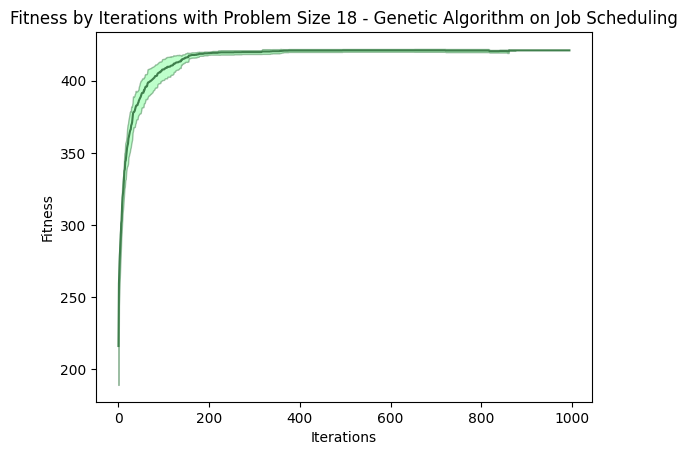

In [37]:
plt.plot(df_fitness_iter_ffp.Iteration, df_fitness_iter_ffp.avg_fitness, 'k', color='#3F7F4C')
plt.fill_between(df_fitness_iter_ffp.Iteration, df_fitness_iter_ffp.avg_fitness - df_fitness_iter_ffp.stddev_fitness\
                 , df_fitness_iter_ffp.avg_fitness + df_fitness_iter_ffp.stddev_fitness\
                 , alpha=0.5, edgecolor='#3F7F4C', facecolor='#7EFF99')
plt.title(f'Fitness by Iterations with Problem Size {size} - Genetic Algorithm on Job Scheduling')
plt.xlabel('Iterations')
plt.ylabel('Fitness')

In [12]:
df_fitness_iter_ffp[(df_fitness_iter_ffp['Iteration']<= 817) & (df_fitness_iter_ffp['Iteration'] >= 220)]['stddev_fitness'].max()

1.6193277068654945

In [39]:
df_fitness_iter_ffp[df_fitness_iter_ffp.Iteration == 400].avg_fitness

400    420.9
Name: avg_fitness, dtype: float64

In [40]:
df_fitness_iter_ffp[df_fitness_iter_ffp.avg_fitness == 178].stddev_fitness.min(),df_fitness_iter_ffp[df_fitness_iter_ffp.avg_fitness == 178].stddev_fitness.max()

(nan, nan)

In [41]:
df_fitness_iter_ffp[df_fitness_iter_ffp.avg_fitness == 178].Iteration.min(),df_fitness_iter_ffp[df_fitness_iter_ffp.avg_fitness == 178].Iteration.max()

(nan, nan)

In [42]:
df_fitness_iter_ffp.stddev_fitness.max()

26.979210102925137

In [43]:
df_fitness_iter_ffp[df_fitness_iter_ffp['Iteration']>0].stddev_fitness.max()

15.262153626973271

In [44]:
df_fitness_iter_ffp[df_fitness_iter_ffp.stddev_fitness == df_fitness_iter_ffp.stddev_fitness.max()].Iteration,

(0    0
 Name: Iteration, dtype: int64,)

In [45]:
df_fitness_iter_ffp[df_fitness_iter_ffp.stddev_fitness == df_fitness_iter_ffp[df_fitness_iter_ffp['Iteration']>0].stddev_fitness.max()].Iteration

1    1
Name: Iteration, dtype: int64

In [46]:
# Fevals - iteration

In [47]:
df_FEvals_iter_ffp = df_iter_curves_ffp.groupby('Iteration')\
                                .agg(avg_FEvals=('FEvals', 'mean'), var_FEvals = ('FEvals', 'var'))\
                                .reset_index()

In [48]:
df_FEvals_iter_ffp.shape

(995, 3)

In [49]:
df_FEvals_iter_ffp.head()

,Iteration,avg_FEvals,var_FEvals
0,0,0.0,0.000000
1,1,1.9,0.100000
2,2,3.6,0.488889
3,3,5.2,0.622222
4,4,6.9,0.766667


In [50]:
df_FEvals_iter_ffp['stddev_FEvals'] = df_FEvals_iter_ffp['var_FEvals'].apply(np.sqrt)

In [51]:
df_FEvals_iter_ffp['stddev_FEvals'].min(), df_FEvals_iter_ffp['stddev_FEvals'].max()

(0.0, 5.561774297230455)

In [52]:
df_FEvals_iter_ffp.head()

,Iteration,avg_FEvals,var_FEvals,stddev_FEvals
0,0,0.0,0.000000,0.000000
1,1,1.9,0.100000,0.316228
2,2,3.6,0.488889,0.699206
3,3,5.2,0.622222,0.788811
4,4,6.9,0.766667,0.875595


Text(0, 0.5, 'FEvals')

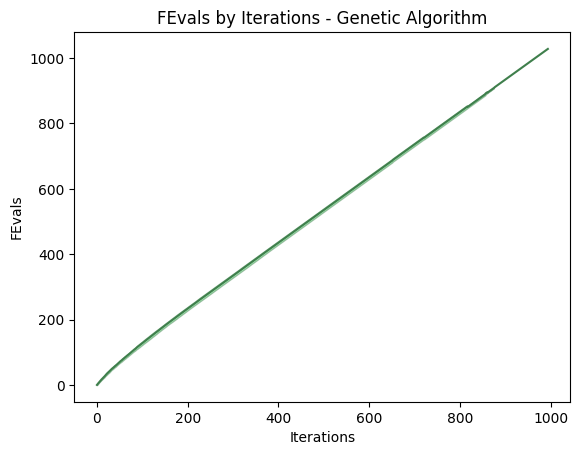

In [53]:
plt.plot(df_FEvals_iter_ffp.Iteration, df_FEvals_iter_ffp.avg_FEvals, 'k', color='#3F7F4C')
plt.fill_between(df_FEvals_iter_ffp.Iteration, df_FEvals_iter_ffp.avg_FEvals - df_FEvals_iter_ffp.stddev_FEvals\
                 , df_FEvals_iter_ffp.avg_FEvals + df_FEvals_iter_ffp.stddev_FEvals\
                 , alpha=0.5, edgecolor='#3F7F4C', facecolor='#7EFF99')
plt.title('FEvals by Iterations - Genetic Algorithm')
plt.xlabel('Iterations')
plt.ylabel('FEvals')

In [54]:
# fitness - wall clock time

In [55]:
df_time_iter_ffp = df_iter_curves_ffp.groupby('Iteration')\
                                .agg(avg_time=('Time', 'mean'), var_time = ('Time', 'var'))\
                                .reset_index()

In [56]:
df_time_iter_ffp.shape

(995, 3)

In [57]:
df_time_iter_ffp.head()

,Iteration,avg_time,var_time
0,0,0.001665,0.000002
1,1,0.010830,0.000072
2,2,0.020234,0.000180
3,3,0.027924,0.000258
4,4,0.033542,0.000322


In [58]:
df_time_iter_ffp['stddev_time'] = df_time_iter_ffp['var_time'].apply(np.sqrt)

In [59]:
df_time_iter_ffp.head()

,Iteration,avg_time,var_time,stddev_time
0,0,0.001665,0.000002,0.001351
1,1,0.010830,0.000072,0.008481
2,2,0.020234,0.000180,0.013411
3,3,0.027924,0.000258,0.016075
4,4,0.033542,0.000322,0.017939


Text(0, 0.5, 'Time')

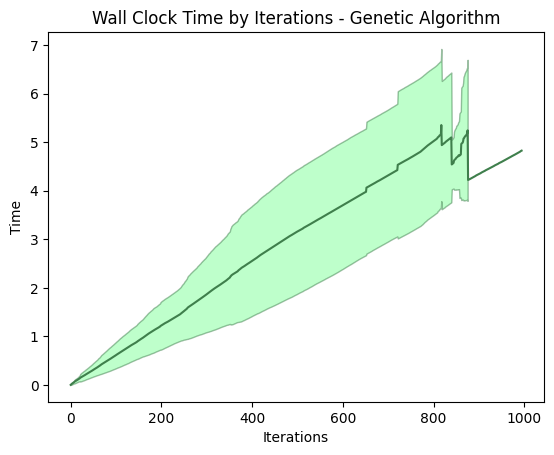

In [60]:
plt.plot(df_time_iter_ffp.Iteration, df_time_iter_ffp.avg_time, 'k', color='#3F7F4C')
plt.fill_between(df_time_iter_ffp.Iteration, df_time_iter_ffp.avg_time - df_time_iter_ffp.stddev_time\
                 , df_time_iter_ffp.avg_time + df_time_iter_ffp.stddev_time\
                 , alpha=0.5, edgecolor='#3F7F4C', facecolor='#7EFF99')
plt.title('Wall Clock Time by Iterations - Genetic Algorithm')
plt.xlabel('Iterations')
plt.ylabel('Time')

In [61]:
df_time_iter_ffp.stddev_time.max()

1.567676414367605

In [62]:
df_time_iter_ffp[df_time_iter_ffp['Iteration'] == 501]

,Iteration,avg_time,var_time,stddev_time
501,501,3.164825,1.639537,1.280444


In [63]:
df_time_iter_ffp[df_time_iter_ffp.stddev_time == df_time_iter_ffp.stddev_time.max()].Iteration

817    817
Name: Iteration, dtype: int64